/tmp/ipykernel_418435/2005228827.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(pth_file_path))



모델의 가중치 확인:

Layer: conv1.weight | Size: torch.Size([64, 3, 7, 7]) | Values : tensor([[[[ 0.0279, -0.0122,  0.0409, -0.0084, -0.0014, -0.0042,  0.0116],
          [ 0.0203,  0.0101,  0.0069, -0.0134,  0.0159,  0.0248,  0.0065],
          [ 0.0374, -0.0295,  0.0107,  0.0102, -0.0129,  0.0108, -0.0177],
          [ 0.0378, -0.0164,  0.0289,  0.0136,  0.0659, -0.0227, -0.0037],
          [ 0.0345,  0.0821,  0.0330,  0.0702,  0.0067, -0.0148,  0.0160],
          [ 0.0166,  0.0501,  0.0906,  0.0151,  0.0612,  0.0037,  0.0022],
          [ 0.0327, -0.0114,  0.0460,  0.0499,  0.0557,  0.0003,  0.0212]],

         [[ 0.0167, -0.0243, -0.0076,  0.0166, -0.0122,  0.0427, -0.0128],
          [-0.0195,  0.0255,  0.0430,  0.0366,  0.0387,  0.0048,  0.0172],
          [-0.0078,  0.0229,  0.0722,  0.0388,  0.0292,  0.0186, -0.0089],
          [-0.0298,  0.0317,  0.0099,  0.0244,  0.0432,  0.0133,  0.0136],
          [ 0.0174, -0.0038,  0.0359,  0.0382,  0.0759,  0.0125, -0.0244],
          [ 0.0012,

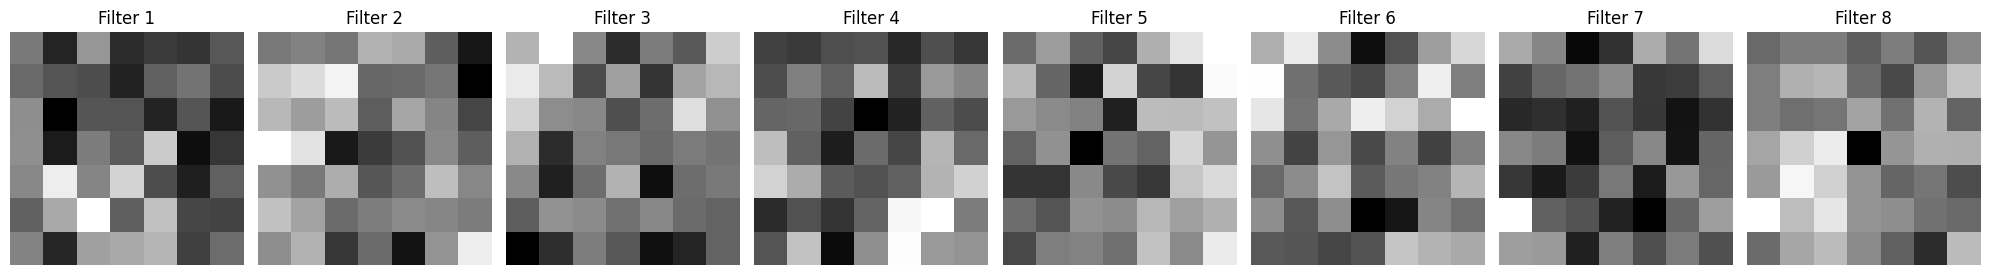


Convolution Layer 2 필터 시각화:



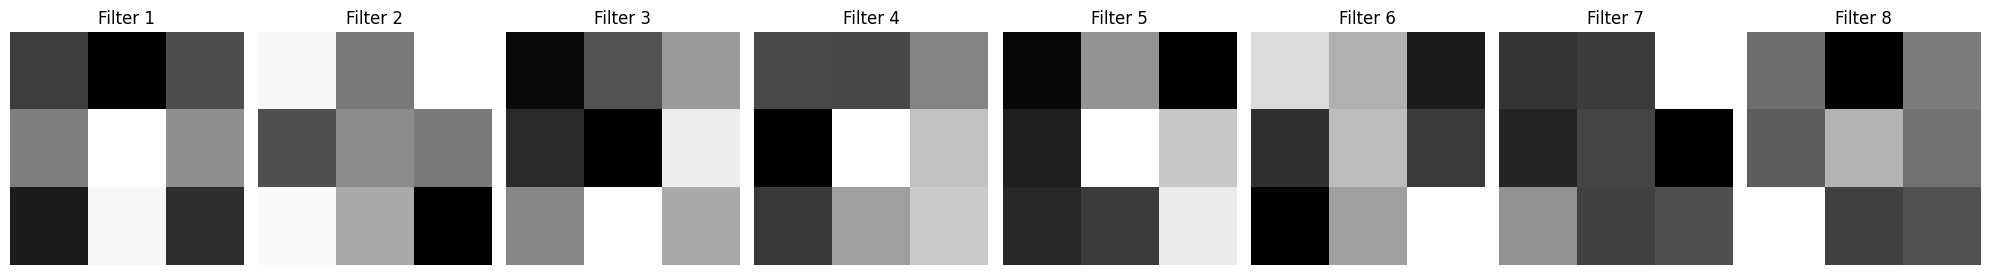


Convolution Layer 3 필터 시각화:



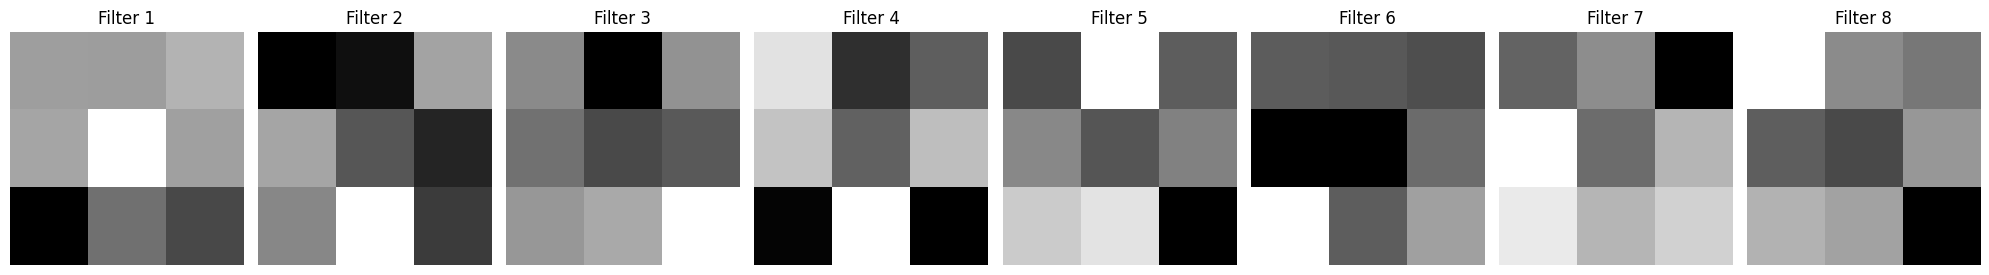


Convolution Layer 4 필터 시각화:



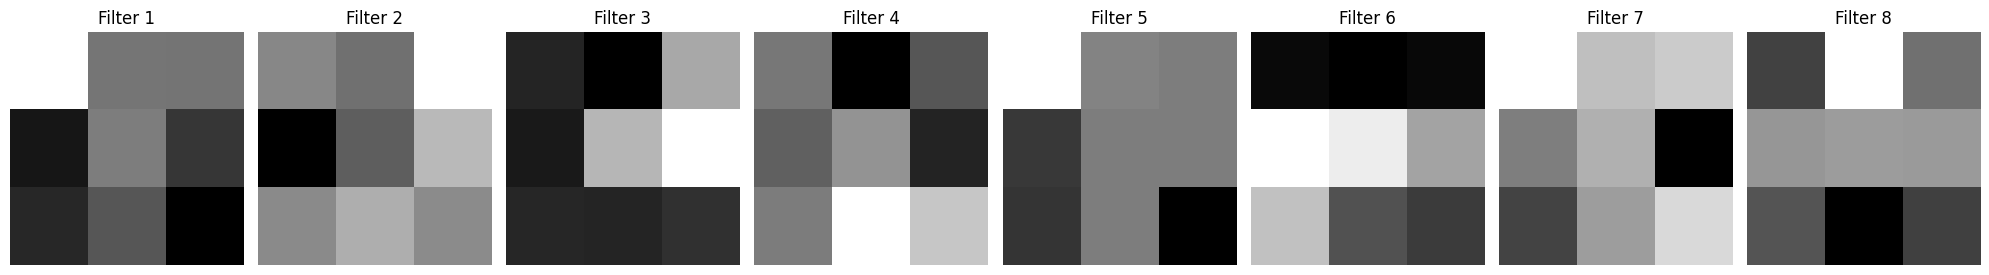


Convolution Layer 5 필터 시각화:



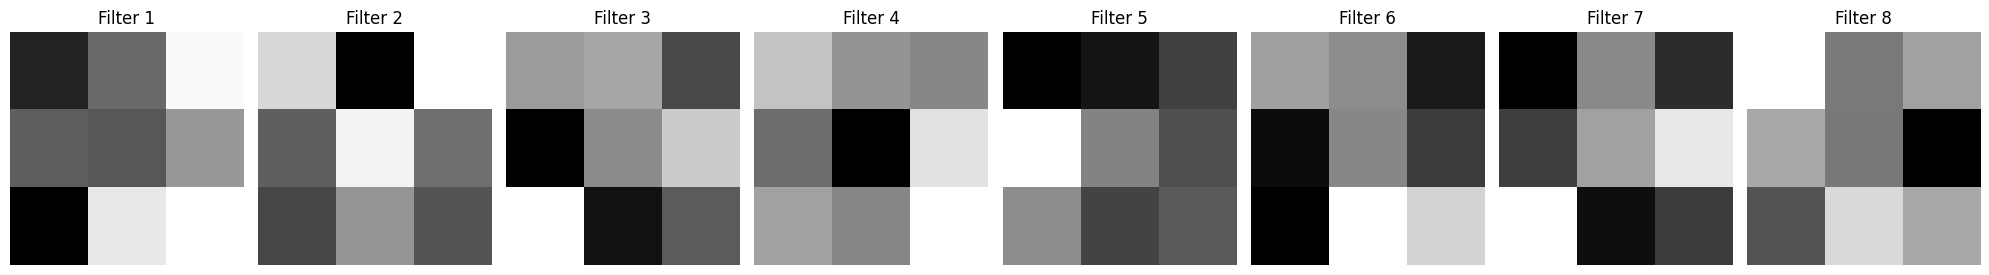


Convolution Layer 6 필터 시각화:



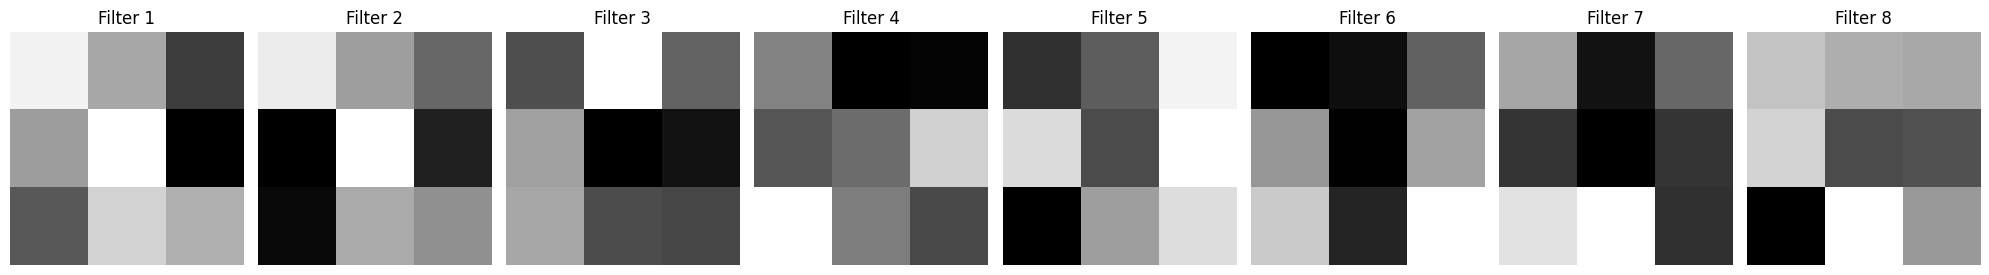


Convolution Layer 7 필터 시각화:



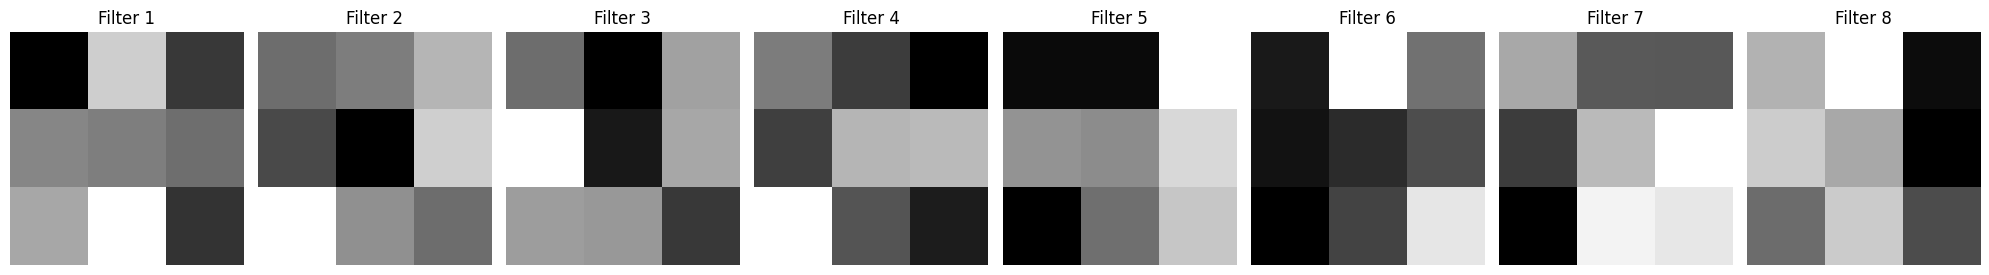


Convolution Layer 8 필터 시각화:



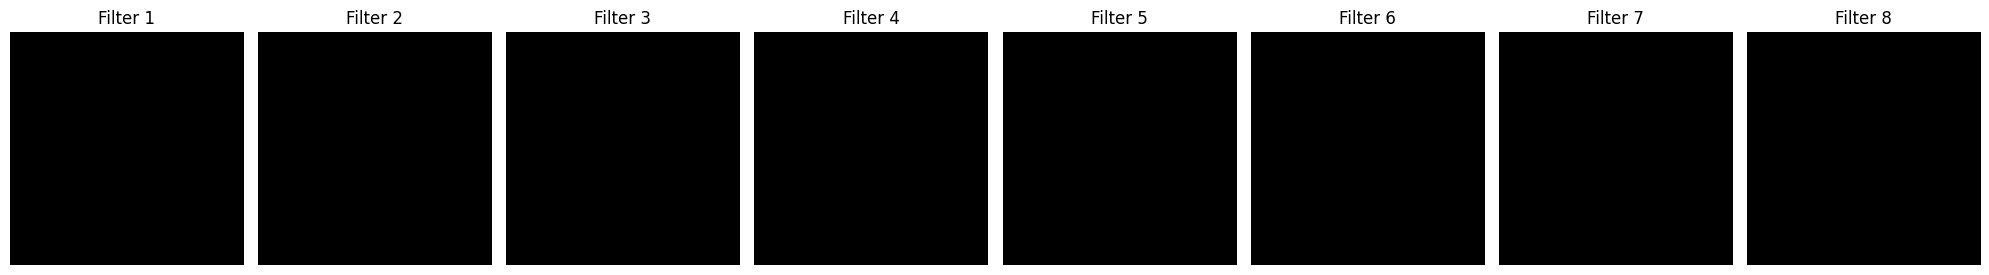


Convolution Layer 9 필터 시각화:



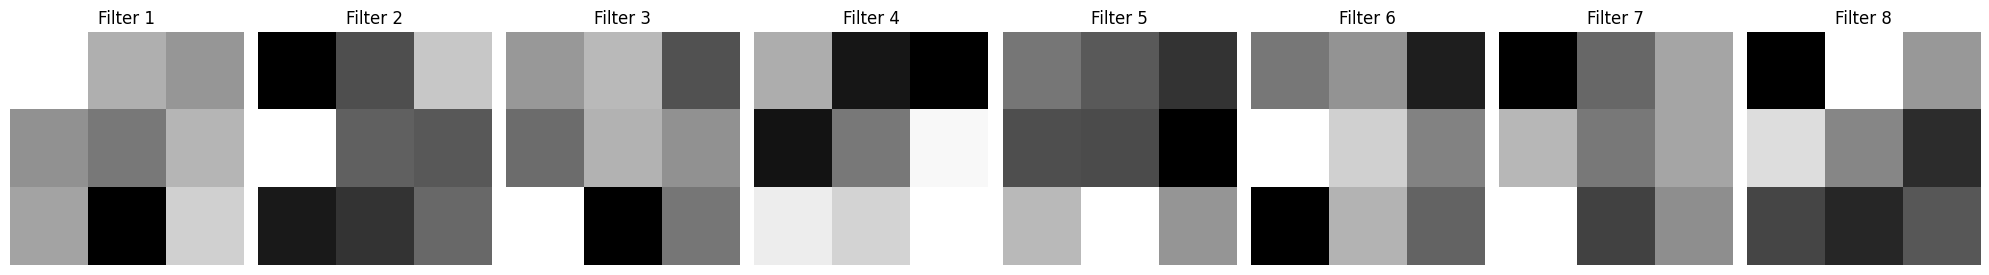


Convolution Layer 10 필터 시각화:



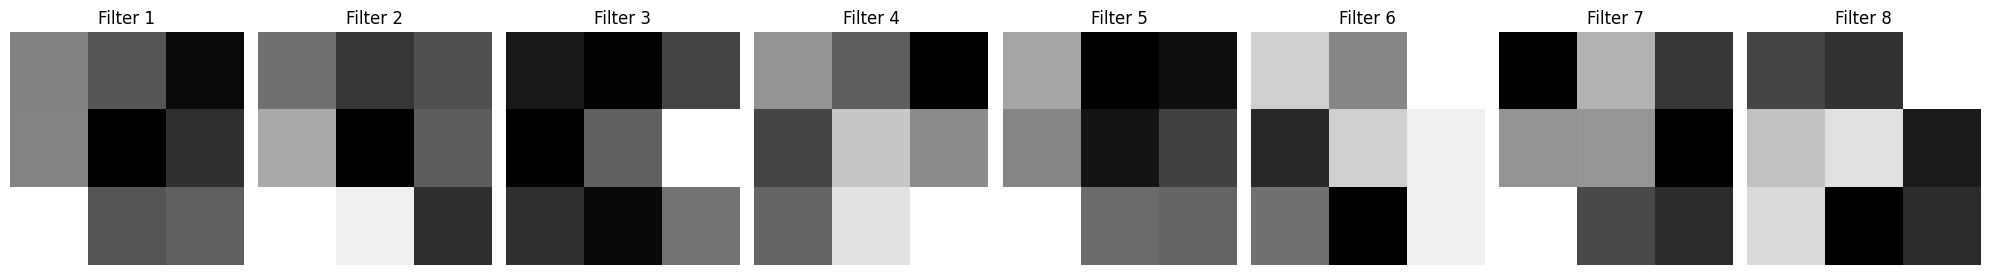


Convolution Layer 11 필터 시각화:



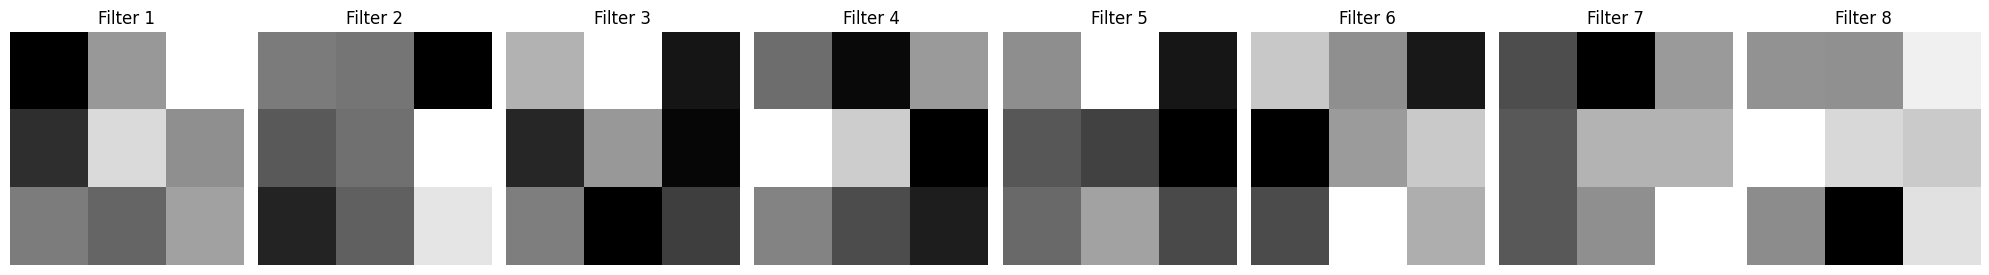


Convolution Layer 12 필터 시각화:



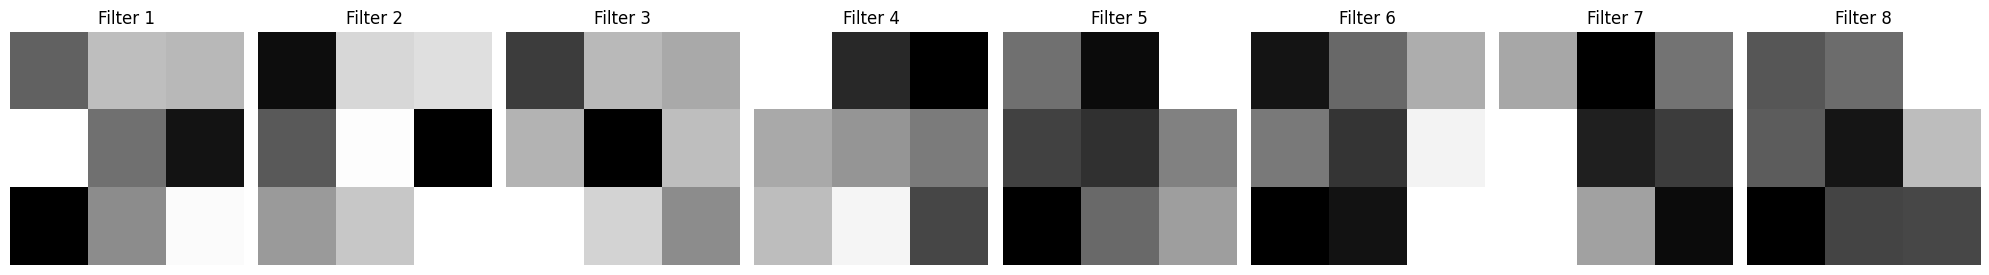


Convolution Layer 13 필터 시각화:



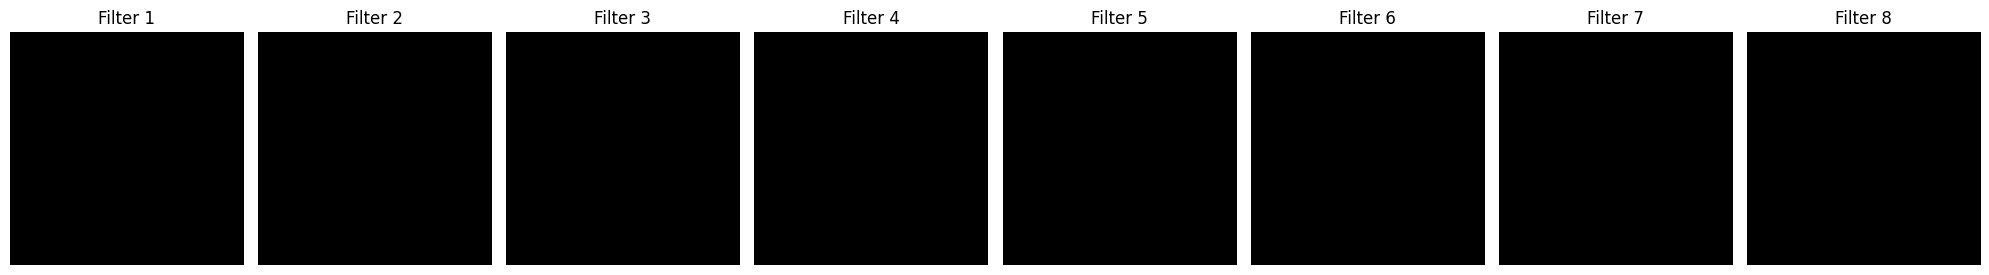


Convolution Layer 14 필터 시각화:



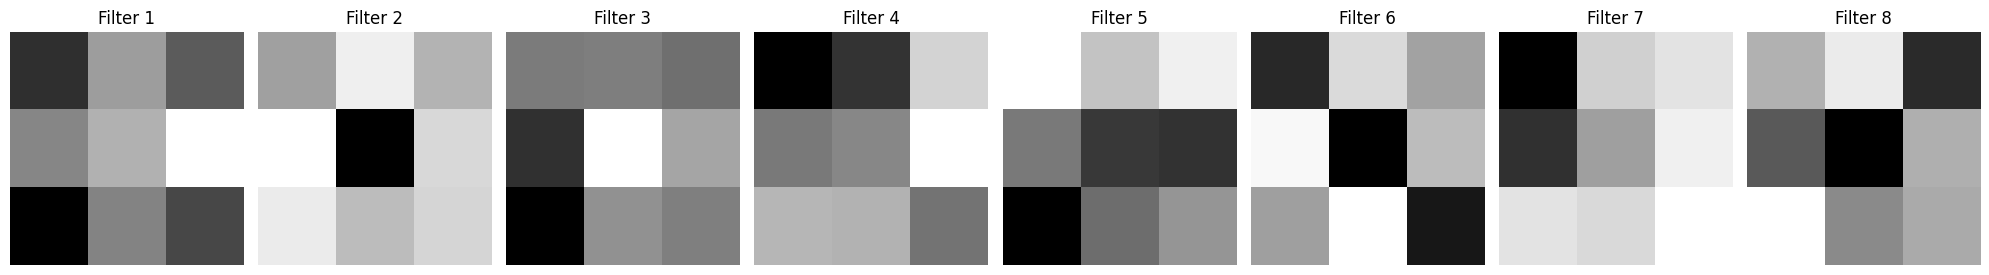


Convolution Layer 15 필터 시각화:



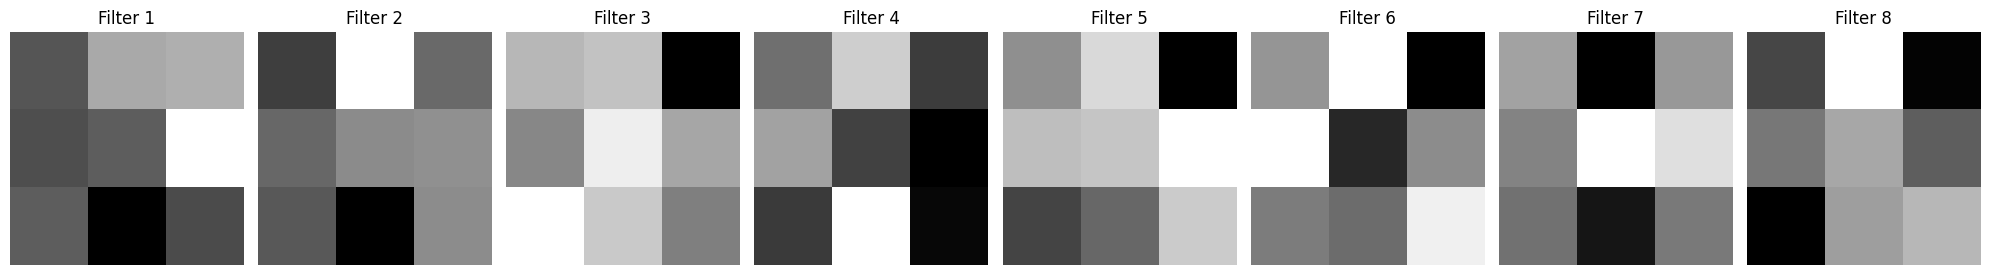


Convolution Layer 16 필터 시각화:



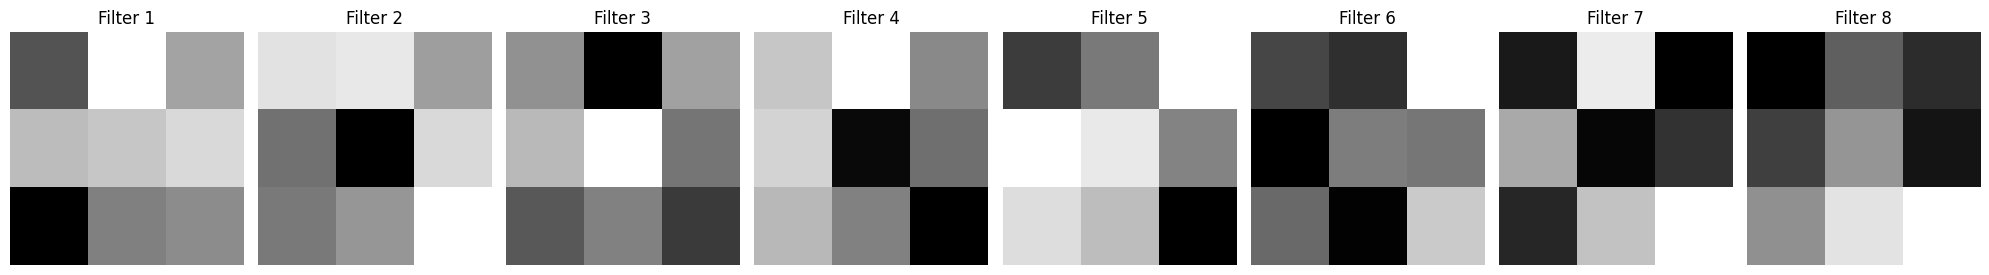


Convolution Layer 17 필터 시각화:



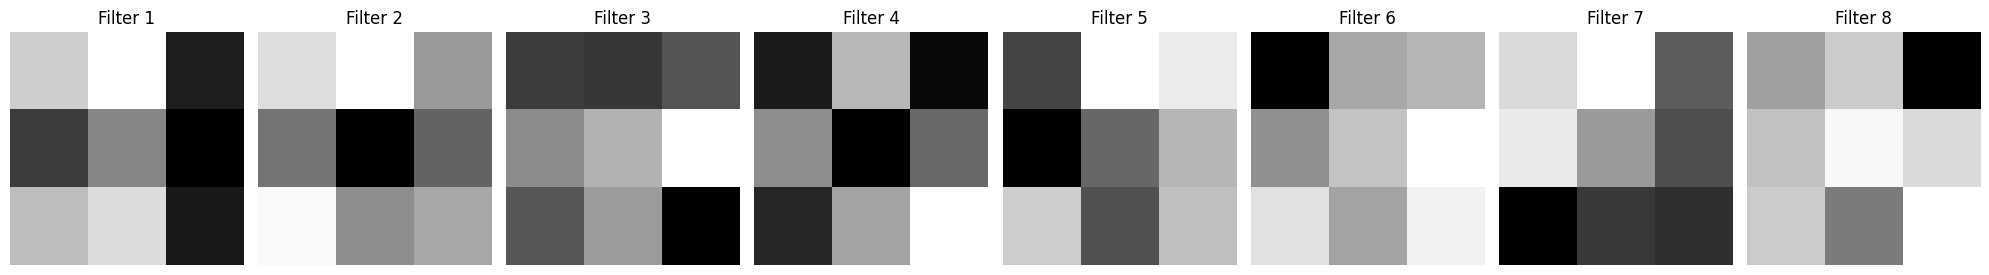


Convolution Layer 18 필터 시각화:



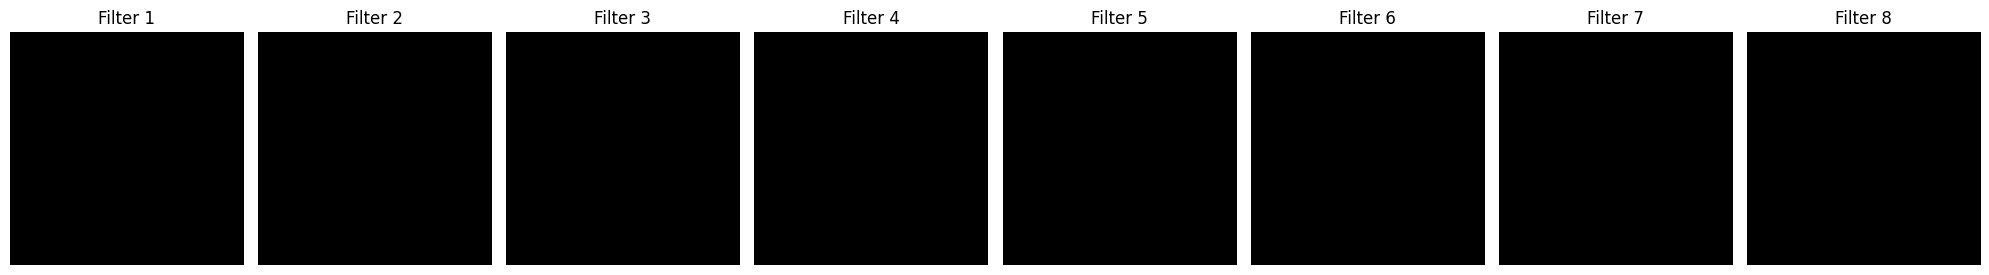


Convolution Layer 19 필터 시각화:



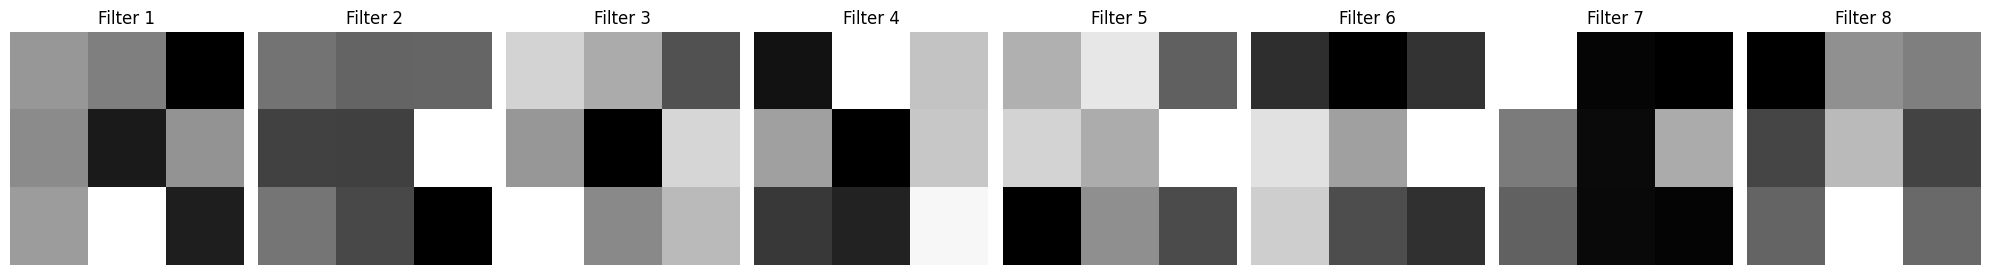


Convolution Layer 20 필터 시각화:



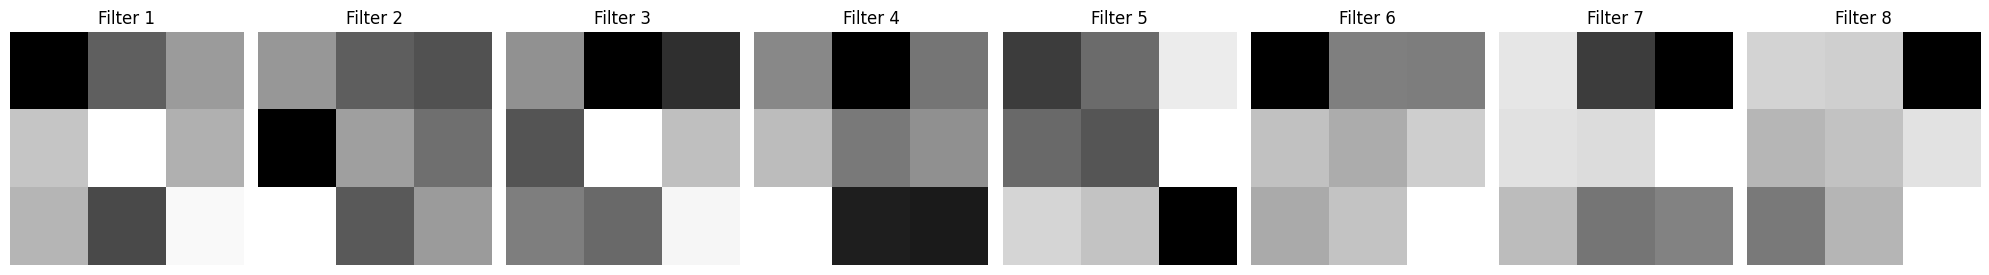


전체 모델 구조:

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inpl

In [7]:
# 필요한 라이브러리 임포트
import torch
import torchvision.models as models
import matplotlib.pyplot as plt

# 1. 모델 정의 및 가중치 로드
# ResNet-18 모델 정의
model = models.resnet18(pretrained=False)

# 마지막 fully connected 레이어 크기 맞추기 (31개의 클래스에 맞도록 수정)
model.fc = torch.nn.Linear(model.fc.in_features, 31)

# 저장된 가중치 불러오기
pth_file_path = '/home/gyuha_lee/DCC2024/mission1/resnet18_gender_style_pretrained.pth'
model.load_state_dict(torch.load(pth_file_path))

# 모델 평가 모드로 전환
model.eval()

# 2. 모델의 가중치 확인하기
print("\n모델의 가중치 확인:\n")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name} | Size: {param.size()} | Values : {param.data[:2]}\n")  # 각 레이어의 이름, 크기, 일부 값 출력

# 3. 각 Convolution 레이어의 필터 시각화
print("\n각 Convolution 레이어의 필터 시각화:\n")
conv_layers = [module for module in model.modules() if isinstance(module, torch.nn.Conv2d)]

for idx, conv_layer in enumerate(conv_layers):
    print(f"\nConvolution Layer {idx + 1} 필터 시각화:\n")
    conv_weights = conv_layer.weight.data

    # 각 레이어의 가중치 중 일부 필터를 시각화 (예: 처음 8개의 필터)
    num_filters = min(8, conv_weights.shape[0])
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 5))
    for i in range(num_filters):
        # 첫 번째 채널만 추출하여 시각화 (필터가 RGB 채널을 가질 경우 각 채널을 따로 시각화 가능)
        filter = conv_weights[i, 0, :, :].cpu().numpy()
        axes[i].imshow(filter, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Filter {i+1}')

    plt.tight_layout()
    plt.show()

# 4. 전체 모델 구조 출력
print("\n전체 모델 구조:\n")
print(model)
